In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import linalg as la
import argparse
import pickle
import sys
sys.path.append("../") 
from utils_quadratic import *
import scipy.linalg  as sla
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
rng= list(range(1, 100)) # list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
random.shuffle(rng)

d = 3

A1 = np.random.randn(d, d)
Q1 = np.random.randn(d, d)
Q1 = np.dot(Q1, Q1.T)

A2 = np.random.randn(d, d)
Q2 = np.random.randn(d, d)
Q2 = np.dot(Q2,Q2.T)
eta_init = 0.01
MAXINNER = 2000
u = np.ones(d)
x0 = np.ones(2*d)

game = quadratic(Q1, Q2, A1, A2, eta_init, MAXINNER, u, d)
i=0
eigs=game.get_alpha_L(u)
alpha=min(eigs)
L=max(eigs)
eta_bound=alpha/(2*L**2)

while (game.check_jacobian(u) == False) or (game.eta_bound < 0.005) :
    np.random.seed(rng[i])
    A1 = np.random.randn(d, d)
    Q1 = np.random.randn(d, d)
    Q1 = np.dot(Q1, Q1.T) + 2*np.eye(d)

    A2 = np.random.randn(d, d)
    Q2 = np.random.randn(d, d)
    Q2 = np.dot(Q2,Q2.T) + 2*np.eye(d)
    game = quadratic(Q1, Q2, A1, A2, eta_init, MAXINNER, u, d)
    #print(game.eta_bound)
    i+=1
print(i,rng[i])

74 15


In [20]:
eigs=game.get_alpha_L(u)
alpha=min(eigs)
L=max(eigs)
eta_bound=alpha/(2*L**2)
eta_bound

0.007144058876562654

In [21]:
game.check_jacobian(u)

True

## Checking convergence of gradient descent to Nash equilibrium

In [22]:
game = quadratic(Q1, Q2, A1, A2, eta_bound, MAXINNER, u, d)

In [23]:
x1, x2 = game.runGradPlay(x0, u)
nash= game.solve_nash(x0)
nash_0 = nash[0:3]
nash_1 = nash[3:6]

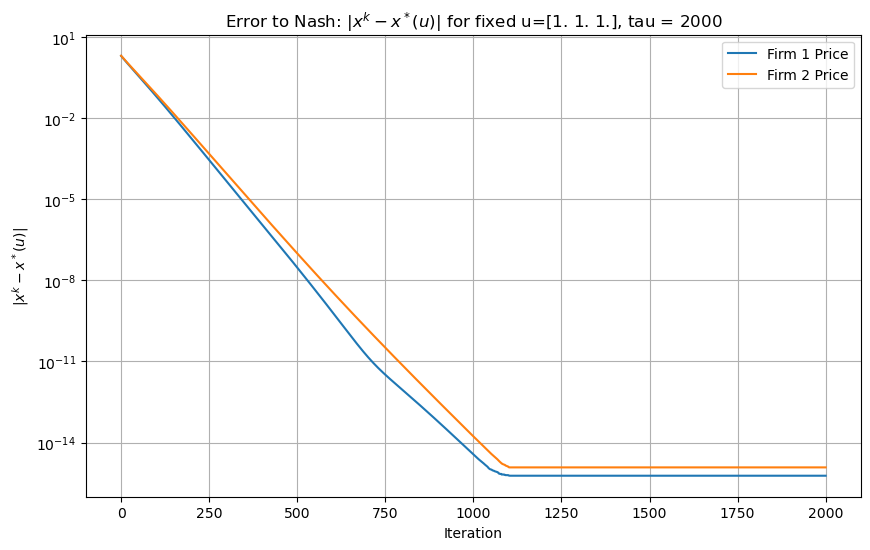

In [24]:
plt.figure(figsize=(10, 6))

plt.plot([np.linalg.norm(x- nash_0) for x in x1], label='Firm 1 Price')
plt.plot([np.linalg.norm(x - nash_1) for x in x2], label='Firm 2 Price')

plt.title('Error to Nash: $\|x^k-x^*(u)\|$ for fixed u='+str(u) + ', tau = ' + str(game.MAXINNER) )
plt.xlabel('Iteration')
plt.ylabel('$\|x^k-x^*(u)\|$')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.show()

## Checking convergence of SGD

In [25]:
MAXINNER = 5000

In [26]:
game = quadratic(Q1, Q2, A1, A2, eta_bound, MAXINNER, u, d)

In [27]:
x1, x2 = game.runSGDPlay(x0, u)
nash= game.solve_nash(x0)
nash_0 = nash[0:3]
nash_1 = nash[3:6]

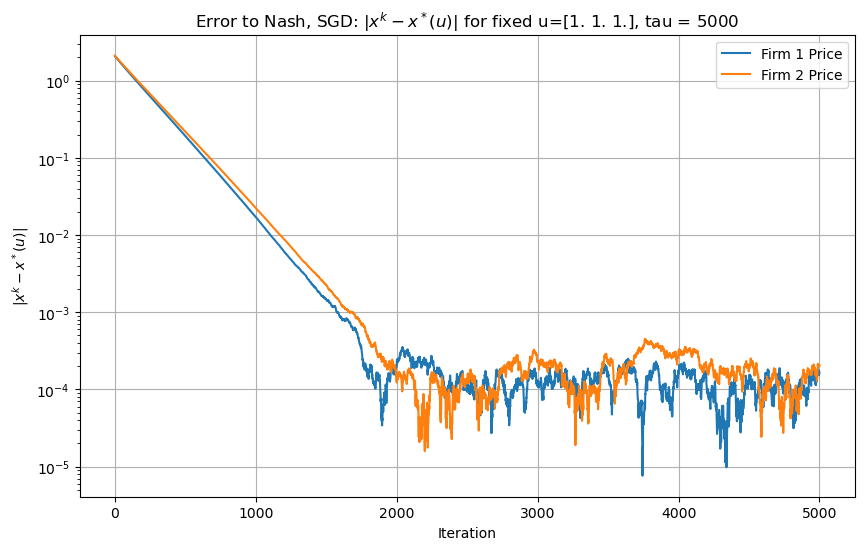

In [28]:
plt.figure(figsize=(10, 6))

plt.plot([np.linalg.norm(x- nash_0) for x in x1], label='Firm 1 Price')
plt.plot([np.linalg.norm(x - nash_1) for x in x2], label='Firm 2 Price')

plt.title('Error to Nash, SGD: $\|x^k-x^*(u)\|$ for fixed u='+str(u) + ', tau = ' + str(game.MAXINNER) )
plt.xlabel('Iteration')
plt.ylabel('$\|x^k-x^*(u)\|$')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.show()

# Running DFO

In [29]:
u_d = np.random.rand(d)
game = quadratic(Q1, Q2, A1, A2, eta_bound, MAXINNER, u_d, d)
nash= game.solve_nash(x0)
x0_d = nash[0:3]
x1_d = nash[3:6]

In [30]:
game.check_jacobian(u)

True

In [31]:
delta = 0.07
gamma_init = 5
MAXOUTER = 5000
u_init = 2*np.ones(d)
burn_in = 0
MAXINNER = 1200

num_samples = 5

## Test a single run here

In [76]:
ix = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
ix.game=quadratic(ix.Q1, ix.Q2, ix.A1, ix.A2, ix.eta, ix.MAXINNER, ix.u, ix.d)
x1s,x2s=ix.game.runGradPlay(np.ones(2*d),np.ones(d))
x1s,x2s=ix.game.runSGDPlay(np.ones(2*d),np.ones(d), var=0.0001)
x1d,x2d=ix.game.get_xd_constrained(np.ones(d))


In [77]:
x1d

[array([-0.10407102, -0.189762  , -0.23110095])]

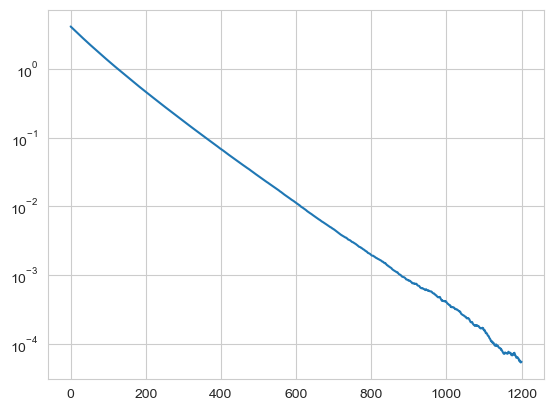

In [78]:
err1=[la.norm(x1_-x1d[0])**2 for x1_ in x1s]
plt.plot(err1)
plt.yscale('log')

In [18]:
incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
loss_history_br, u_history, x_history, play_loss = incent_control.runDFOBR(np.ones(2*d))#, 0.001 )

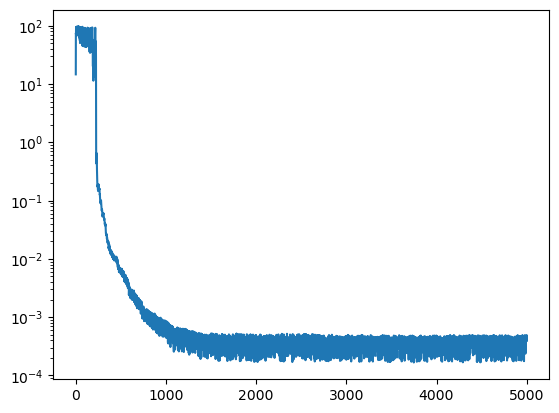

In [19]:
plt.plot(loss_history_br)
plt.yscale('log')

In [59]:
np.random.normal(2,1,d)

array([1.44528794, 0.50718887, 4.42149109])

In [56]:
incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
loss_history, u_history, x_history, play_loss = incent_control.runDFOSGD(np.ones(2*d), 0.001)
#loss_history_sgd, u_history_sgd = incent_control.runDFOSGD(0.001)

KeyboardInterrupt: 

In [ ]:
plt.plot(loss_history)
plt.plot(loss_history_br, color ='green')
plt.yscale('log')

## DFO: Multiple trials

### Gradient Descent (GD)

In [79]:
u_inits_dict = {}
loss_history_dict = {}
x_history_dict = {}
u_history_dict = {}
play_loss_dict = {}
means_dict = {}
std_dict = {}

In [ ]:
random.seed(42)
num_trials = 10
x_init = np.ones(2*d)

loss_history_all_us = []
x_history_all_us = []
u_history_all_us = []
play_loss_all_us = []
u_init_list = []

u_init_list = []
for i in range(num_trials):
    u_init = np.random.normal(2,1,d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history, u_history, x_history, play_loss = incent_control.runDFO(x_init)
    
    u_init_list.append(u_init)
    loss_history_all_us.append(loss_history)
    u_history_all_us.append(u_history)
    x_history_all_us.append(x_history)
    play_loss_all_us.append(play_loss)

In [ ]:
# Convert list of results to a numpy array for easier analysis
loss_history_all_us = np.array(loss_history_all_us)

# Calculate mean and standard deviation
mean_results = np.mean(loss_history_all_us, axis=0)
std_results = np.std(loss_history_all_us, axis=0)

In [112]:
u_inits_dict['dfo_gd'] = u_init_list
loss_history_dict['dfo_gd'] = loss_history_all_us
x_history_dict['dfo_gd'] = x_history_all_us
u_history_dict['dfo_gd'] = u_history_all_us
play_loss_dict['dfo_gd'] = play_loss_dict
means_dict['dfo_gd'] = mean_results
std_dict['dfo_gd'] = std_results

### Stochastic Gradient Descent (SGD)

In [115]:
random.seed(42)
loss_history_all_us_sgd = []
num_trials = 10
var = 0.001
x_init = np.ones(2*d)

loss_history_all_us_sgd = []
x_history_all_us_sgd = []
u_history_all_us_sgd = []
play_loss_all_us_sgd = []
u_init_list_sgd = []

for i in range(num_trials):
    u_init = np.random.normal(2,1,d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history_sgd, u_history_sgd, x_history_sgd, play_loss_sgd = incent_control.runDFOSGD(x_init, var)
    
    u_init_list_sgd.append(u_init)
    loss_history_all_us_sgd.append(loss_history_sgd)
    u_history_all_us_sgd.append(u_history_sgd)
    x_history_all_us_sgd.append(x_history_sgd)
    play_loss_all_us_sgd.append(play_loss_sgd)

KeyboardInterrupt: 

In [71]:
# Convert list of results to a numpy array for easier analysis
loss_history_all_us_sgd = np.array(loss_history_all_us_sgd)

# Calculate mean and standard deviation
mean_results_sgd = np.mean(loss_history_all_us_sgd, axis=0)
std_results_sgd = np.std(loss_history_all_us_sgd, axis=0)

In [ ]:
u_inits_dict['dfo_sgd'] = u_init_list_sgd
loss_history_dict['dfo_sgd'] = loss_history_all_us_sgd
x_history_dict['dfo_sgd'] = x_history_all_us_sgd
u_history_dict['dfo_sgd'] = u_history_all_us_sgd
play_loss_dict['dfo_sgd'] = play_loss_dict_sgd
means_dict['dfo_sgd'] = mean_results_sgd
std_dict['dfo_sgd'] = std_results_sgd

### Best Response (BR)

In [20]:
random.seed(42)
loss_history_all_us_br = []
num_trials = 10
var = 0.001
x_init = np.ones(2*d)

loss_history_all_us_br = []
x_history_all_us_br = []
u_history_all_us_br = []
play_loss_all_us_br = []
u_init_list_br = []

for i in range(num_trials):
    u_init = np.random.normal(2,1,d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history_br, u_history_br, x_history_br, play_loss_br = incent_control.runDFOBR(x_init)
    
    u_init_list_br.append(u_init)
    loss_history_all_us_br.append(loss_history_br)
    u_history_all_us_br.append(u_history_br)
    x_history_all_us_br.append(x_history_br)
    play_loss_all_us_br.append(play_loss_br)

In [21]:
# Convert list of results to a numpy array for easier analysis
loss_history_all_us_br = np.array(loss_history_all_us_br)

# Calculate mean and standard deviation
mean_results_br = np.mean(loss_history_all_us_br, axis=0)
std_results_br = np.std(loss_history_all_us_br, axis=0)

In [ ]:
u_inits_dict['dfo_br'] = u_init_list_sgd
loss_history_dict['dfo_br'] = loss_history_all_us_sgd
x_history_dict['dfo_br'] = x_history_all_us_sgd
u_history_dict['dfo_br'] = u_history_all_us_sgd
play_loss_dict['dfo_br'] = play_loss_dict_sgd
means_dict['dfo_br'] = mean_results_sgd
std_dict['dfo_br'] = std_results_sgd

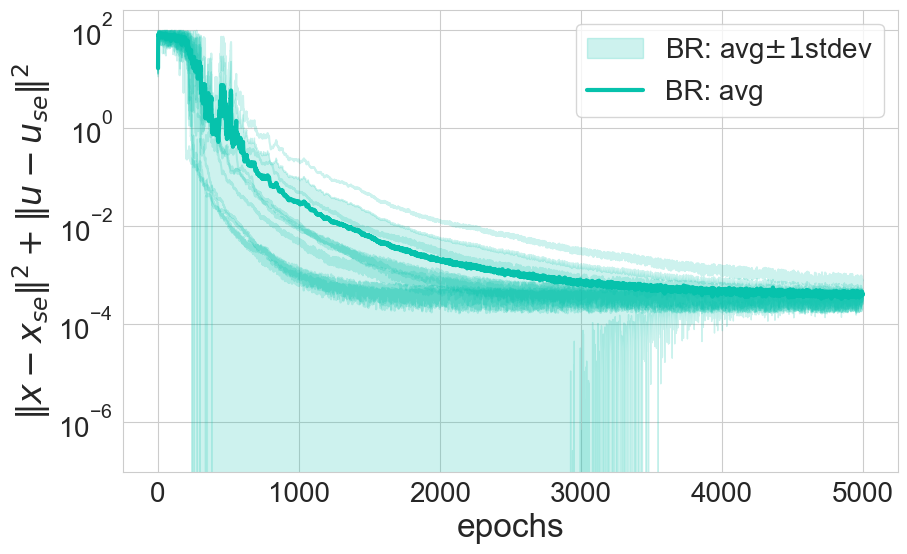

In [22]:
fs=24
import os
import seaborn as sns
sns.set_style("whitegrid")

cols=['xkcd:tangerine', 'xkcd:turquoise']
plt.figure(figsize=(10, 6))

# Plotting

plt.fill_between(range(MAXOUTER + burn_in + 1), mean_results_br - std_results_br, mean_results_br + std_results_br, color=cols[1], alpha=0.2, label='BR: avg$\pm 1$stdev')
plt.plot(range(MAXOUTER + burn_in+ 1), mean_results_br, label=r'BR: avg', color=cols[1], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(loss_history_all_us_br):
    plt.plot(range(MAXOUTER + burn_in + 1), result, color=cols[1], alpha=0.2)  # Individual trajectories

#plt.title('DFO Trajectories, $u_0 \sim \mathcal{N}(10, 2)$', fontsize=16)
plt.xlabel('epochs', fontsize=fs)
plt.ylabel('$\Vert x - x_{se}\Vert^2 + \Vert u-u_{se}\Vert^2$', fontsize=fs)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=fs-4)
plt.tick_params(labelsize=fs-4)

figpath="./figs/"
if not(os.path.exists(figpath)): os.makedirs(figpath)
for tag in ['png','pdf']:
    plt.savefig(figpath+'dfo.'+tag, transparent=True, bbox_inches='tight',dpi=300 )

## Run this for deterministic GD

In [81]:
loss_history_all_us = []

# Sample u_init and run DFO for each sample
for _ in range(num_samples):
    u_init = np.random.normal(5,2, d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history, u_history = incent_control.runDFO()
    
    loss_history_all_us.append(loss_history)

# Convert list of results to a numpy array for easier analysis
loss_history_all_us = np.array(loss_history_all_us)

# Calculate mean and standard deviation
mean_results = np.mean(loss_history_all_us, axis=0)
std_results = np.std(loss_history_all_us, axis=0)

TypeError: runDFO() missing 1 required positional argument: 'x_init'

## Run this for SGD

In [66]:
loss_history_all_us_sgd = []

# Sample u_init and run DFO for each sample
for _ in range(num_samples):
    u_init = np.random.normal(5,2, d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history, u_history = incent_control.runDFOSGD(0.001)
    
    loss_history_all_us_sgd.append(loss_history)

# Convert list of results to a numpy array for easier analysis
loss_history_all_us_sgd = np.array(loss_history_all_us_sgd)

# Calculate mean and standard deviation
mean_results_sgd = np.mean(loss_history_all_us_sgd, axis=0)
std_results_sgd = np.std(loss_history_all_us_sgd, axis=0)

TypeError: runDFOSGD() missing 1 required positional argument: 'var'

In [1215]:
# plt.fill_between(range(MAXOUTER + burn_in), mean_results - std_results, mean_results + std_results, color='gray', alpha=0.2, label='Mean ±1 std. dev.')
# plt.plot(range(MAXOUTER + burn_in), mean_results, label='Mean trajectory')
# for result in loss_history_all_us:
#     plt.plot(range(MAXOUTER + burn_in), result, color='blue', alpha=0.2)  # Individual trajectories

# plt.title('DFO Trajectories, $u_0 \sim \mathcal{N}(10, 2)$')
# plt.xlabel('Epochs')
# plt.ylabel('Loss, $\|x - x_d\|^2 + \|u-u_d\|^2$')
# plt.yscale('log')
# plt.legend()
# plt.show()

In [1214]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl

# # Setting a light style with gridlines
# plt.style.use('seaborn-whitegrid')

# # Create a color palette
# palette = plt.get_cmap('Set1')

# # Increasing default font size
# mpl.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# # Adjusting figure size
# plt.figure(figsize=(10, 6))

# # Plotting
# plt.fill_between(range(MAXOUTER + burn_in), mean_results - std_results, mean_results + std_results, color='gray', alpha=0.2, label='Mean ±1 std. dev.')
# plt.plot(range(MAXOUTER + burn_in), mean_results, label='Mean trajectory', color='darkorange', linewidth=3) # Enhanced visibility for mean trajectory
# for i, result in enumerate(loss_history_all_us):
#     plt.plot(range(MAXOUTER + burn_in), result, color='blue', alpha=0.2)  # Individual trajectories

# # Adding title and labels
# #plt.title('DFO Trajectories, $u_0 \sim \mathcal{N}(10, 2)$', fontsize=16)
# plt.xlabel('Epochs', fontsize=14)
# plt.ylabel('Loss, $\|x - x_d\|^2 + \|u-u_d\|^2$', fontsize=14)

# # Setting yscale to log
# plt.yscale('log')

# # Adding legend
# plt.legend(loc='upper right')

# # Show plot
# plt.show()
# plt.savefig('dfo_sgd.png')

In [25]:
import pickle as pk 
data={
    'game': incent_control.game,
    'mean_results_sgd': mean_results_sgd,
    'std_results_sgd': std_results_sgd,
    'loss_history_all_us_sgd': loss_history_all_us_sgd,
    'loss_history_all_us': loss_history_all_us,
    'mean_results': mean_results,
    'std_results': std_results
}
pk.dump(data, open("dfo_run_v1.pk",'wb'))

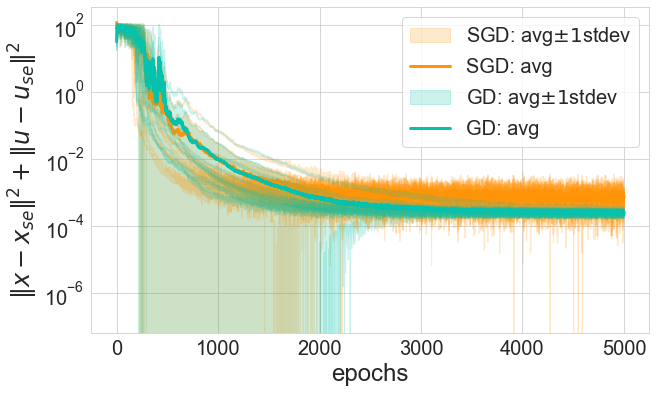

In [74]:
fs=24
import os
import seaborn as sns
sns.set_style("whitegrid")

cols=['xkcd:tangerine', 'xkcd:turquoise']
plt.figure(figsize=(10, 6))

# Plotting
plt.fill_between(range(MAXOUTER + burn_in + 1), mean_results_sgd - std_results_sgd, mean_results_sgd + std_results_sgd, color=cols[0], alpha=0.2, label=r'SGD: avg$\pm 1$stdev')
plt.plot(range(MAXOUTER + burn_in + 1), mean_results_sgd, label=r'SGD: avg', color=cols[0], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(loss_history_all_us_sgd):
    plt.plot(range(MAXOUTER + burn_in +1), result, color=cols[0], alpha=0.2)  # Individual trajectories

plt.fill_between(range(MAXOUTER + burn_in +1 ), mean_results - std_results, mean_results + std_results, color=cols[1], alpha=0.2, label='GD: avg$\pm 1$stdev')
plt.plot(range(MAXOUTER + burn_in + 1), mean_results, label=r'GD: avg', color=cols[1], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(loss_history_all_us):
    plt.plot(range(MAXOUTER + burn_in+ 1), result, color=cols[1], alpha=0.2)  # Individual trajectories

#plt.title('DFO Trajectories, $u_0 \sim \mathcal{N}(10, 2)$', fontsize=16)
plt.xlabel('epochs', fontsize=fs)
plt.ylabel('$\Vert x - x_{se}\Vert^2 + \Vert u-u_{se}\Vert^2$', fontsize=fs)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=fs-4)
plt.tick_params(labelsize=fs-4)

figpath="./figs/"
if not(os.path.exists(figpath)): os.makedirs(figpath)
for tag in ['png','pdf']:
    plt.savefig(figpath+'dfo.'+tag, transparent=True, bbox_inches='tight',dpi=300 )

## RGM

### Best Response (BR)

In [46]:
u_inits_dict = {}
data_dict = {}
means_dict = {}
std_dict = {}

In [48]:
random.seed(42)
num_trials = 10
data_history_br = []
err_history_br = []
u_inits_br = []

for i in range(num_trials):
    ix = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    u0_1 = np.random.normal(2,1,d)
    u0_2 = np.random.normal(2,1,d)
    u0 = np.hstack((u0_1, u0_2))
    u_inits_br.append(u0)
#print(u0, np.ones(2*d))
    data=ix.runIncentRGM(u0, np.ones(2*d), tag='BR')
    data_history_br.append(data)
    err_history_br.append(data['err'])

In [49]:
# Convert list of results to a numpy array for easier analysis
err_history_br = np.array(err_history_br)

# Calculate mean and standard deviation
mean_err_br = np.mean(err_history_br, axis=0)
std_err_br = np.std(err_history_br, axis=0)

In [54]:
u_inits_dict['br'] = u_inits_br
data_dict['br'] = data_history_br
means_dict['br'] = mean_err_br
std_dict['br'] = std_err_br

### Gradient Play (GP)

In [51]:
random.seed(42)
num_trials = 10
data_history_gp = []
err_history_gp = []
u_inits_gp = []

for i in range(num_trials):
    ix = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    u0_1 = np.random.normal(2,1,d)
    u0_2 = np.random.normal(2,1,d)
    u0 = np.hstack((u0_1, u0_2))
    u_inits_gp.append(u0)
#print(u0, np.ones(2*d))
    data=ix.runIncentRGM(u0, np.ones(2*d), tag='GP')
    data_history_gp.append(data)
    err_history_gp.append(data['err'])

In [52]:
# Convert list of results to a numpy array for easier analysis
err_history_gp = np.array(err_history_gp)

# Calculate mean and standard deviation
mean_err_gp = np.mean(err_history_gp, axis=0)
std_err_gp = np.std(err_history_gp, axis=0)

In [56]:
u_inits_dict['gp'] = u_inits_gp
data_dict['gp'] = data_history_gp
means_dict['gp'] = mean_err_gp
std_dict['gp'] = std_err_gp

### Stochastic Gradient Descent (SGD)

In [58]:
random.seed(42)
num_trials = 10
data_history_sgd = []
err_history_sgd = []
u_inits_sgd = []

for i in range(num_trials):
    ix = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    u0_1 = np.random.normal(2,1,d)
    u0_2 = np.random.normal(2,1,d)
    u0 = np.hstack((u0_1, u0_2))
    u_inits_sgd.append(u0)
#print(u0, np.ones(2*d))
    data=ix.runIncentRGM(u0, np.ones(2*d), tag='SGD')
    data_history_sgd.append(data)
    err_history_sgd.append(data['err'])

In [59]:
# Convert list of results to a numpy array for easier analysis
err_history_sgd = np.array(err_history_sgd)

# Calculate mean and standard deviation
mean_err_sgd = np.mean(err_history_sgd, axis=0)
std_err_sgd = np.std(err_history_sgd, axis=0)

In [60]:
u_inits_dict['sgd'] = u_inits_sgd
data_dict['sgd'] = data_history_sgd
means_dict['sgd'] = mean_err_sgd
std_dict['sgd'] = std_err_sgd

In [62]:
import pickle as pk 
data={
    'game': ix.game,
    'u_inits_dict': u_inits_dict,
    'data_dict': data_dict,
    'means_dict': means_dict,
    'std_dict':std_dict
}
pk.dump(data, open("rgm_run.pk",'wb'))

In [88]:
num_trials = 10
data_history_sgd = []
err_history_sgd = []

for i in range(num_trials):
    ix = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    u0_1 = np.random.normal(2,1,d)
    u0_2 = np.random.normal(2,1,d)
    u0 = np.hstack((u0_1, u0_2))
#print(u0, np.ones(2*d))
    data=ix.runIncentRGM(u0, np.ones(2*d), tag='SGD')
    data_history_sgd.append(data)
    err_history_sgd.append(data['err'])

In [94]:
# Convert list of results to a numpy array for easier analysis
err_history_sgd = np.array(err_history_sgd)

# Calculate mean and standard deviation
mean_err_sgd = np.mean(err_history_sgd, axis=0)
std_err_sgd = np.std(err_history_sgd, axis=0)

In [95]:
len(err_history_sgd)

10

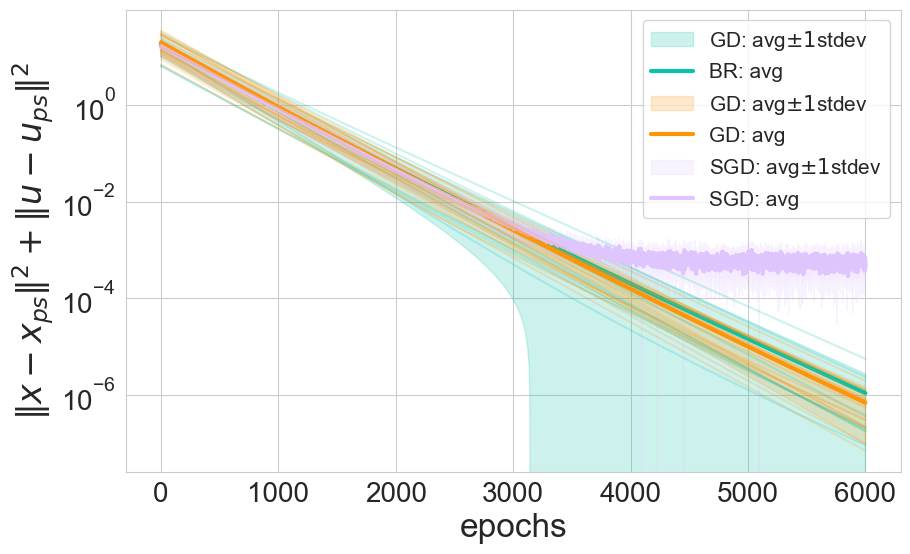

In [65]:
fs=24
import os
import seaborn as sns
sns.set_style("whitegrid")

cols=['xkcd:turquoise','xkcd:tangerine', 'xkcd:light lavender']
plt.figure(figsize=(10, 6))

# Plotting
# plt.fill_between(range(6000 + burn_in + 1), mean_err_sgd - std_err_sgd, mean_err_sgd + std_err_sgd, color=cols[1], alpha=0.2, label='SGD: avg$\pm 1$stdev')
# plt.plot(range(6000 + burn_in + 1 ), mean_err_sgd, label=r'SGD: avg', color=cols[0], linewidth=3) # Enhanced visibility for mean trajectory
# for i, result in enumerate(err_history_sgd):
#     plt.plot(range(6000 + burn_in +1), result, color=cols[0], alpha=0.2)  # Individual trajectories


plt.fill_between(range(6000 + burn_in + 1), mean_err_br - std_err_br, mean_err_br + std_err_br, color=cols[0], alpha=0.2, label='GD: avg$\pm 1$stdev')
plt.plot(range(6000 + burn_in + 1 ), mean_err_br, label=r'BR: avg', color=cols[0], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(err_history_br):
    plt.plot(range(6000 + burn_in +1), result, color=cols[0], alpha=0.2)  # Individual trajectories

plt.fill_between(range(6000 + burn_in + 1), mean_err_gp - std_err_gp, mean_err_gp + std_err_gp, color=cols[1], alpha=0.2, label='GD: avg$\pm 1$stdev')
plt.plot(range(6000 + burn_in + 1 ), mean_err_gp, label=r'GD: avg', color=cols[1], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(err_history_gp):
    plt.plot(range(6000 + burn_in +1), result, color=cols[1], alpha=0.2)  # Individual trajectories

plt.fill_between(range(6000 + burn_in + 1), mean_err_sgd - std_err_sgd, mean_err_sgd + std_err_sgd, color=cols[2], alpha=0.2, label='SGD: avg$\pm 1$stdev')
plt.plot(range(6000 + burn_in + 1 ), mean_err_sgd, label=r'SGD: avg', color=cols[2], linewidth=3) # Enhanced visibility for mean trajectory
for i, result in enumerate(err_history):
    plt.plot(range(6000 + burn_in +1), result, color=cols[1], alpha=0.2)  # Individual trajectories

plt.xlabel('epochs', fontsize=fs)
plt.ylabel('$\Vert x-x_{ps}\Vert^2 + \Vert u-u_{ps}\Vert^2$', fontsize=fs)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=fs-9)
plt.tick_params(labelsize=fs-4)

figpath="./figs/"
if not(os.path.exists(figpath)): os.makedirs(figpath)
for tag in ['png','pdf']:
    plt.savefig(figpath+'rgm.'+tag, transparent=True, bbox_inches='tight',dpi=300 )

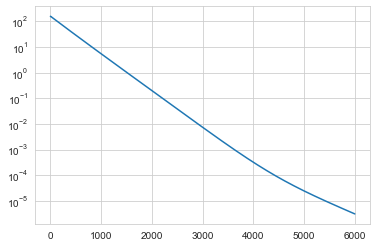

In [81]:
plt.plot(data['err'])
plt.yscale('log')

### Inner Player SGD: DONT RUN THIS

In [1198]:
delta = 0.25
gamma_init = 100
MAXOUTER = 10000
u_init = 2*np.ones(d)
burn_in = 100
MAXINNER = 1200

num_samples = 10
var_inner = 0.00001

In [1199]:
loss_history_all_us = []

# Sample u_init and run DFO for each sample
for _ in range(num_samples):
    u_init = np.random.normal(5,2, d)
    incent_control = incent(Q1, Q2, A1, A2, x0_d, x1_d, u_d, d, delta,u_init, eta_bound, gamma_init, MAXINNER, MAXOUTER, burn_in)
    loss_history, u_history = incent_control.runDFOSGD(var_inner)
    
    loss_history_all_us.append(loss_history)

# Convert list of results to a numpy array for easier analysis
loss_history_all_us = np.array(loss_history_all_us)

# Calculate mean and standard deviation
mean_results = np.mean(loss_history_all_us, axis=0)
std_results = np.std(loss_history_all_us, axis=0)

[7.5534681  2.04453288 7.06511346]
SGD Distance to Nash, Burn-in
True
True
100
[-234.40918632 -913.9981821  -840.53843671]
[5. 5. 5.]
SGD Distance to Nash, Burn-in
True
True
100
[ 796.32760933 -275.98718011 -227.39256806]
[-5.  5.  5.]
SGD Distance to Nash, Burn-in
True
True
100
[-427.10814776  -20.71614054 -761.5079521 ]
[5. 5. 5.]
SGD Distance to Nash, Burn-in
True
True
100
[-186.77206714   48.4312092   863.00454703]
[ 5. -5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[341.37298725 162.58520635 896.36386715]
[-5. -5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[ -396.79139084  -406.95494278 -1008.89475055]
[5. 5. 5.]
SGD Distance to Nash, Burn-in
True
True
100
[ 268.33666929 -638.80871813  519.45582438]
[-5.  5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[ -80.44009459  -65.20909153 1039.65045658]
[ 5.  5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[ 692.29561571 -716.12947041  192.34961103]
[-5.  5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[-1101.75301

SGD Distance to Nash, Burn-in
True
True
100
[-450.36520311  128.58779987  865.41770868]
[ 5. -5. -5.]
SGD Distance to Nash, Burn-in
True
True
100
[-497.29369081  697.32827809 -474.02981338]
[ 5. -5.  5.]
SGD Distance to Nash, Burn-in
True
True
100
[-534.66801032 -369.5640939  -559.07054225]
[5. 5. 5.]
SGD Distance to Nash, Burn-in
True
True
100
[ 270.10586719  312.77712712 -753.74282396]
[-5. -5.  5.]
SGD Distance to Nash, Burn-in
True
True
100
[-431.55561817  831.23622139  -28.46955575]
[ 5. -5.  5.]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ksk/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/cn/wpc2vc951hs1wtznx5c_whb5kqkshb/T/ipykernel_42199/1937080780.py", line 7, in <module>
    loss_history, u_history = incent_control.runDFOSGD(var_inner)
  File "/Users/ksk/Desktop/Berkeley Year 1/Spring 2024/Decision Dependence/decision-dependence/2024ICML/ntbks/../utils_quadratic.py", line 79, in runDFOSGD
    history_0, history_1, costs_0, cost_1 = self.game.runSGDPlay(var) # Run firm gradient play
  File "/Users/ksk/Desktop/Berkeley Year 1/Spring 2024/Decision Dependence/decision-dependence/2024ICML/ntbks/../utils_quadratic.py", line 242, in runSGDPlay
    x_next1 = self.proj(self.x1 - self.eta * self.gradPlayer(0) + noise_1)
  File "/Users/ksk/Desktop/Berkeley Year 1/Spring 2024/Decision Dependence/decision-dependence/2024ICML/ntbks/../utils_quadratic.py",

In [1143]:
import numpy as np
from scipy.optimize import minimize

def objective_function(vars, Q1, Q2, A1, A2, d):
    x1, x2, u = vars[:d], vars[d:2*d], vars[2*d:3*d]
    return x1.T @ Q1 @ x1 + x1.T @ A1 @ x2 + u.T @ x1 + x2 @ Q2 @ x2 + x1.T @ A2 @ x2 + u.T @ x2 + 0.6500001*np.linalg.norm(u)

def constraint1(vars, Q1, Q2, A1, A2, d):
    x1, x2, u = vars[:d], vars[d:2*d], vars[2*d:3*d]
    return 2 * Q1 @ x1 + A1 @ x2 + u

def constraint2(vars, Q1, Q2, A1, A2, d):
    x1, x2, u = vars[:d], vars[d:2*d], vars[2*d:3*d]
    return 2 * Q2 @ x2 + A2.T@x1 + u

def optimize_system(d, Q1, Q2, A1, A2, vars0, bounds):
    # Define constraints
    con1 = {'type': 'eq', 'fun': constraint1, 'args': (Q1, Q2, A1, A2, d)}
    con2 = {'type': 'eq', 'fun': constraint2, 'args': (Q1, Q2, A1, A2, d)}
    constraints = [con1, con2]

    # Perform the optimization
    result = minimize(objective_function, vars0, args=(Q1, Q2, A1, A2, d), method='SLSQP', bounds=bounds, constraints=constraints)

    # Print the result
    print("Optimal values for x1, x2, and u:", result.x)
    print("Minimum value of the objective function:", result.fun)
    print("Optimization successful:", result.success)
    return result

d = 3
bounds_x1 = (-10, 10)  # Bounds for x1
bounds_x2 = (-10, 10)  # Bounds for x2
bounds_u = (-5, 5)  # Bounds for u

bounds = [bounds_x1] * d + [bounds_x2] * d + [bounds_u] * d

# Initial guesses for x1, x2, and u (d-dimensional vectors)
vars0 = np.random.rand(3 * d) 

# Call the optimization function
result = optimize_system(d, Q1, Q2, A1, A2, vars0, bounds)


Optimal values for x1, x2, and u: [-2.87622600e-07 -5.43607093e-08 -2.32044365e-07 -2.99878280e-07
  2.30259801e-07 -4.39498722e-07  1.41247507e-06 -8.52369100e-07
  1.60645663e-06]
Minimum value of the objective function: 1.496739254381626e-06
Optimization successful: True


In [1189]:
import pickle
with open('game_instance.pkl', 'wb') as file:
    data_to_save = {
        'Q1': Q1,
        'Q2': Q2,
        'A1': A1,
        'A2': A2,
        'x1_d': x0_d,
        'x2_d': x1_d,
        'u_d': u_d
    }
    pickle.dump(data_to_save, file)